In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np
from time import time

In [3]:
def read_points(dataset_name, y_col_number):
    x = []
    y = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != y_col_number:
                        float_row.append(float(row[i]))
                x.append(float_row)
                y.append(float(row[y_col_number]))
    return x, y

In [4]:
t_min = 0.1
t_max = 10000
def get_temperature(iteration): 
    return t_max * 0.1 / iteration

In [5]:
def get_prob(iteration, diff):
    return np.exp(- diff * 1.0 / get_temperature(iteration))

In [6]:
def path_length(x):
    dist = 0
    for i in range(1, len(x)):
        dist += np.abs(x[i][0] - x[i - 1][0]) + np.abs(x[i][1] - x[i - 1][1])
    return dist

In [7]:
def get_next(x):
    new_x = x[:]
    i = random.randint(0, len(x) - 1)
    j = random.randint(0, len(x) - 1)    
    if (i > j) :
        new_x[j:i] = new_x[j:i][::-1]
    else:
        new_x[i:j] = new_x[i:j][::-1]
    return new_x

In [8]:
def simulated_annealing():
    x, _ = read_points("../Datasets/tsp.csv", 0)
    random.seed(time())
    np.random.shuffle(x)
    temp = t_max
    iteration = 0
    while(temp > t_min):
        iteration += 1
        temp = get_temperature(iteration)
        new_x = get_next(x)
        diff = path_length(new_x) - path_length(x)
        if diff <= 0:
            x = new_x
        else:
            prob = get_prob(iteration, diff)
            change = np.random.choice([0, 1], p=[1 - prob, prob])
            if change == 1:
                x = new_x
    
    print("Length = " + str(path_length(x)))

    l1_path = []
    for i in range(1, len(x)):
        l1_path.append(x[i - 1])
        l1_path.append([x[i - 1][0], x[i][1]])
    l1_path.append(x[len(x) - 1])
    plt.plot(np.array(l1_path)[:,0], np.array(l1_path)[:,1])
    plt.show()

Length = 9650.0


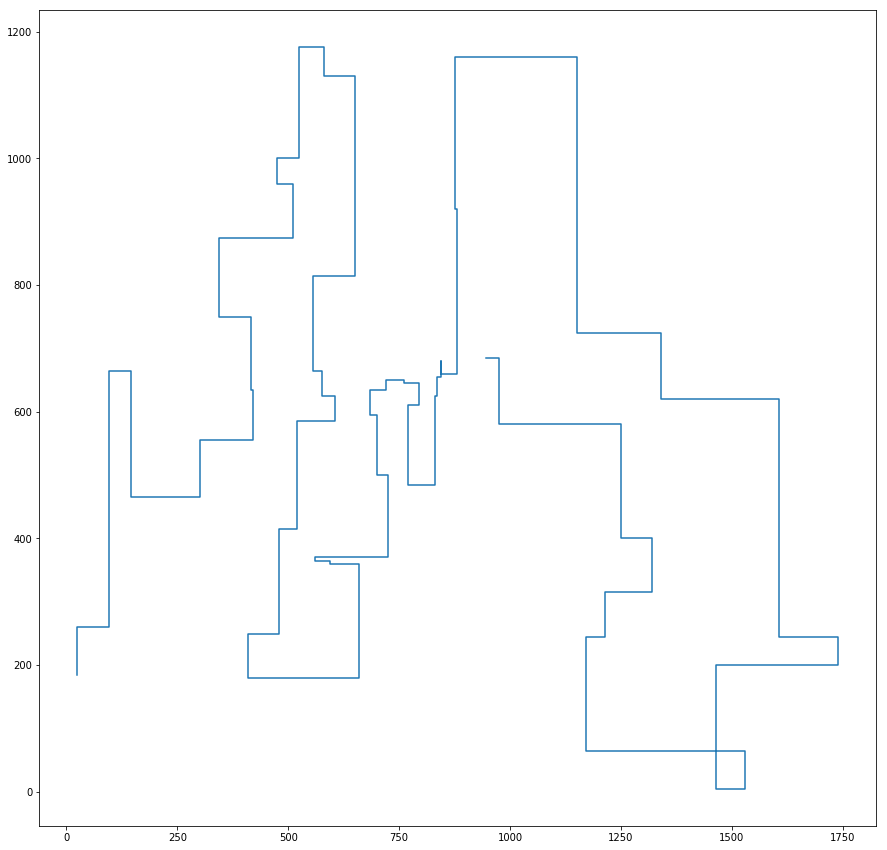

In [9]:
simulated_annealing()